NumPy array format: [366. 363. 360. ... 476. 474. 473.]
The raw signal, sampled at 25 Hz, was preprocessed using a second order 0.05-3 Hz bandpass Butterworth filter.

The peak detection was carried out using the method described in Khoadadad et al. (2018).

The respiratory volume per time computation was carried out using the method described in Harrison et al. (2021).

   RSP_Rate_Mean  RSP_Rate_SD
0       18.23655    10.811094

References
- Harrison, S. J., Bianchi, S., Heinzle, J., Stephan, K. E., Iglesias, S., & Kasper, L. (2021).
            A Hilbert-based method for processing respiratory timeseries.
            Neuroimage, 230, 117787.
- Khodadad, D., Nordebo, S., Müller, B., Waldmann, A., Yerworth, R., Becher, T., ... & Bayford, R. (2018).
            Optimized breath detection algorithm in electrical impedance tomography.
            Physiological measurement, 39(9), 094001.
- Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lespinasse, F., Pham, H.,
    Schölzel, C., & C

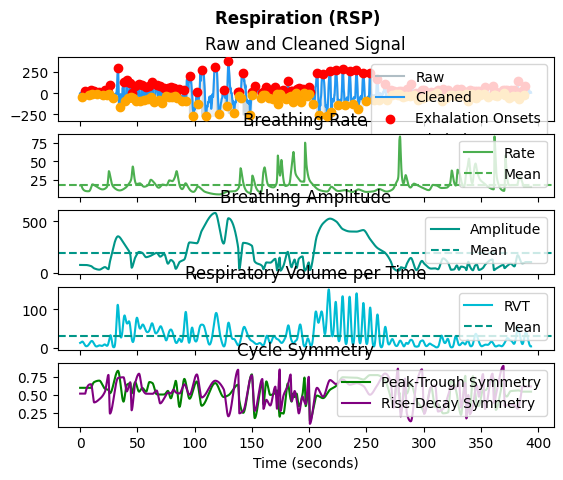

In [19]:
import numpy as np
import pandas as pd
import neurokit2 as nk
import matplotlib.pyplot as plt


file_path = 'RESBi2_P5.txt'


with open(file_path, 'r') as file:
    lines = file.readlines()


data_list = []
for line in lines:
    stripped_line = line.strip()
    if stripped_line:  
        try:
            data_list.append(float(stripped_line))
        except ValueError:
            print(f"Could not convert line to float: {stripped_line}")


rsp = np.array(data_list)
print("NumPy array format:", rsp)

rsp=nk.rsp_clean(rsp, sampling_rate=25, method="khodadad2018")
signals, info = nk.rsp_process(rsp, sampling_rate=25, report="text")
print(info)


fig = nk.rsp_plot(signals, info)
plt.show()


In [20]:
signals.to_csv('P5_RES2.csv', index=False)